In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("E:/HealthCompass/data/raw/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
df['sex'] = df['sex'].apply(lambda x:1 if x=='male' else 0)
df['smoker'] = df['smoker'].apply(lambda x:1 if x=='yes' else 0)

In [10]:
df = df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)

In [11]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


<Axes: >

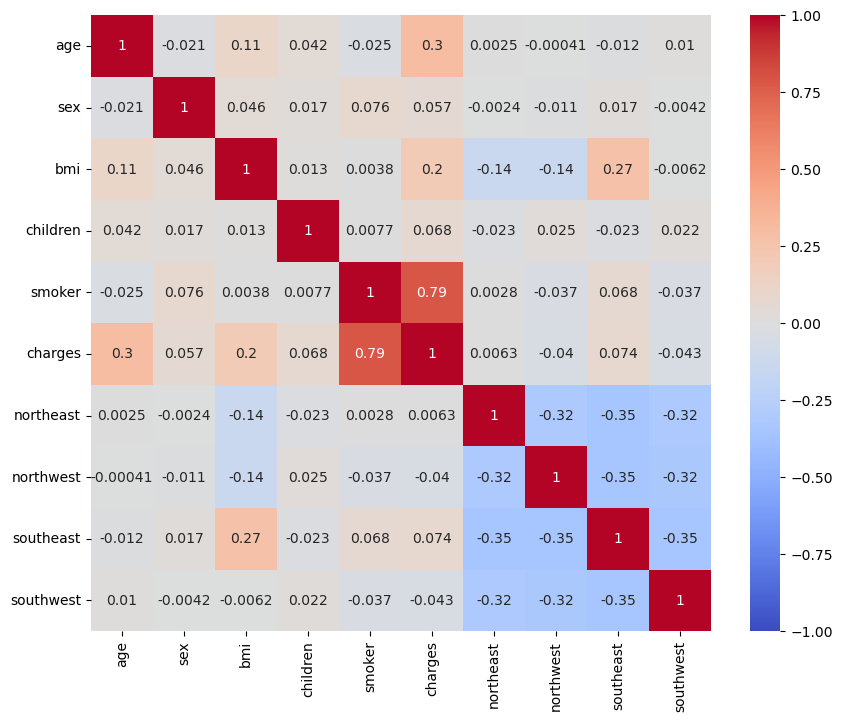

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', vmin = -1, vmax = 1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


X = df.drop('charges', axis=1)
Y = df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
modelPoly = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

In [17]:
modelPoly.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [19]:
Y_pred = modelPoly.predict(X_test)

In [21]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

2789.2914095264737

In [24]:
rmse = root_mean_squared_error(Y_test, Y_pred)
rmse

4373.004310811213

In [25]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
model.score(X_test, Y_test)

0.8752930588577614

In [27]:
Y_pred = model.predict(X_test)
rmse = root_mean_squared_error(Y_test, Y_pred)

In [28]:
rmse

4195.111749086363

In [29]:
df.charges.std()

12110.011236693994

In [30]:
mae = mean_absolute_error(Y_pred, Y_test)

In [31]:
mae

2349.432320846548

Text(0.5, 1.0, 'Prediction vs Truth')

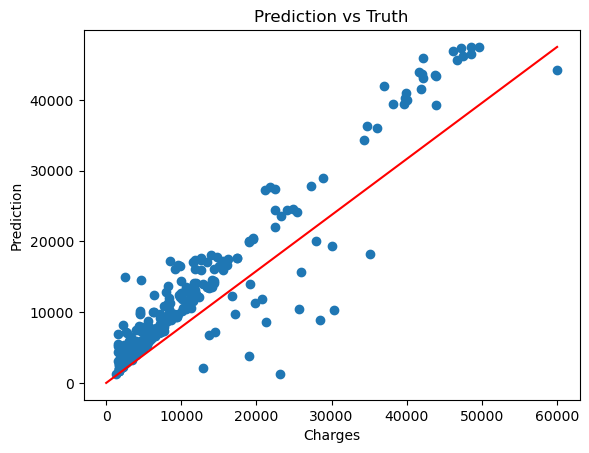

In [32]:
import numpy as np
plt.scatter(Y_test, Y_pred)
plt.plot(np.linspace(0,max(Y_test)), np.linspace(0,max(Y_pred)), color = 'red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Truth')

Text(0.5, 1.0, 'Feature importances')

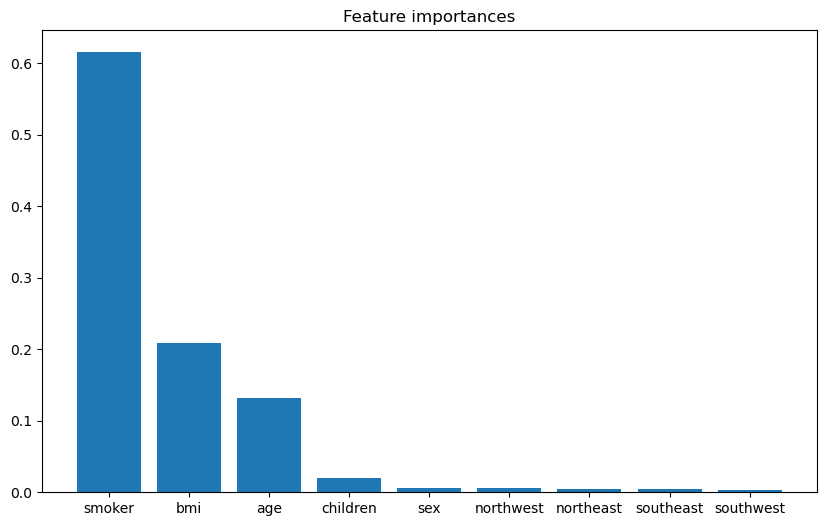

In [33]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse=True)
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title('Feature importances')

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [None, 2, 5],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf': [1,2,4,6]
}

model = RandomForestRegressor(n_jobs =-1)

grid_search = GridSearchCV(model, param_grid = param_grid, cv=5)

In [35]:
grid_search.fit(X_train, Y_train)

,estimator,RandomForestR...sor(n_jobs=-1)
,param_grid,"{'max_depth': [None, 2, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [36]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [37]:
model = grid_search.best_estimator_

In [38]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,4
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
model.score(X_test, Y_test)

0.8905876961823662

In [73]:
Y_pred = model.predict(X_test)

In [40]:
rmse = root_mean_squared_error(Y_test, Y_pred)
rmse

4195.111749086363

In [41]:
mae = mean_absolute_error(Y_pred, Y_test)
mae

2349.432320846548

Text(0.5, 1.0, 'Prediction vs Truth')

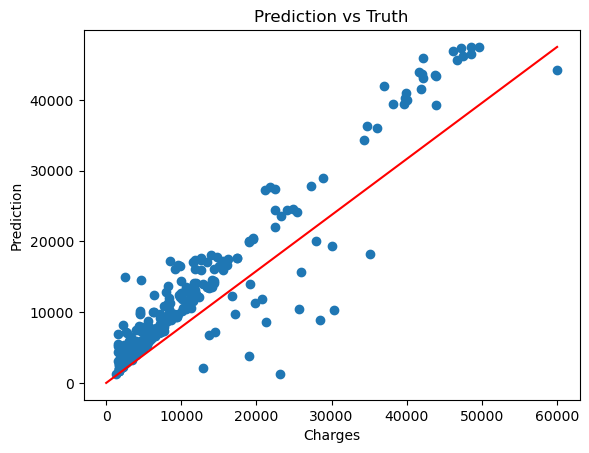

In [42]:
plt.scatter(Y_test, Y_pred)
plt.plot(np.linspace(0,max(Y_test)), np.linspace(0,max(Y_pred)), color = 'red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Truth')

In [43]:
import joblib

In [44]:
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']